# Основы машинного обучения

## Задачи ML

Какие задачи машинного обучения существуют? Обычно выделяют следующие категории:

1. задачи классификации;
2. задачи регрессии;
3. задачи ранжирования.

* **Задача классификации** – это когда требуется входные данные отнести к тому или иному классу (например, изображения разделить на кошек и собак, или распознать произнесенное слово, или по медицинским данным выдать диагноз и т.п.).
* В **задачах регрессии** обычно делают прогнозы в виде вещественных чисел на основе входных данных (например, оценка курса валют по предыдущим показаниям, или прогноз объема продаж товара определенного вида, или просто построить прогноз некоторой функции по измеренным эмпирическим данным и т.д.).
* Наконец, третий тип задач подразумевает **упорядочивание** (по некоторому критерию) входного набора данных. Классический пример – это поисковые системы, которые ранжируют поисковую выборку по релевантности для каждого конкретного пользователя.

## Данные для ML

У каждой задачи есть набор входных данных $X_i$ (признаков) и значения целевой переменной $Y_i$ (target).

Наша задача построить некоторую функцию соответсвия $a_i = a(X_i)$, также именуемую решающуей функцией (decision function). Для этого входной набор данных разбивается на две части: train (обучающая выборка) и test (на ней тестируется модель).

Совокупность данных уже может выступать в качестве обучающей выборки, так как каждому входному вектору (наблюдению)  поставлено в соответствие значение (или вектор). Такие данные еще называют размеченными и являются, своего рода, «золотом», «валютой» для алгоритмов машинного обучения, т.к. их формирование, зачастую, - это самый сложный и длительный процесс, требующий участие одного или группы людей.

Но и это еще не все. Исходные результаты измерений  могут иметь сложную структуру (например, при кодировании текстов, звуков или изображений) и трудно интерпретируемыми самими алгоритмами. В частности, до появления глубоких нейронных сетей (deep learning) в задачах классификации изображений инженеры формировали, так называемые, вторичные признаки: выделяли различные монотонные области, границы объектов с помощью различных фильтров. Доходило даже до того, что набрасывали на изображение случайные линии и пытались, затем, вычислять различные соотношения площадей. И такие подходы в разных задачах давали определенные результаты. По-английски это называется **feature extraction** и **feature engineering** – непростой и творческий процесс, создания более информативных признаков.

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Линейная регрессия. Бинарная классификация

Рассмотрим графический пример. Допустим у нас есть два класса объектов $C_1$ (кругляшки) и $C_2$ (ромбики). Как нам научить программу различать эти два класса?

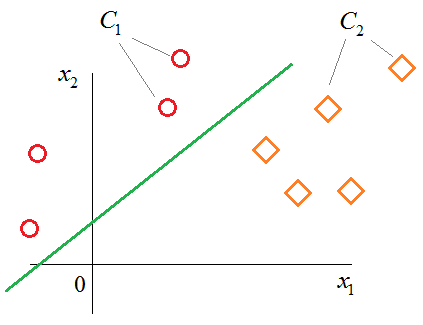

Очевидным решением явлется проведение разделяющией линии (в случае многомерных пространств - гиперплоскости). Запишем уравнение линейной функции:

$ y = k \cdot x + b $

Перепишем в обозначениях нашего координатного пространства:

$ x_2 = k \cdot x_1 + b$

$ x_2 - k \cdot x_1 - b = 0$

Переобозначим коэффициенты:

$ w_2 \cdot x_2 - w_1 \cdot x_1 - w_0 = 0$

Значит, наша задача найти вектор параметров $[w_2, w_1, w_0]$.

Если немного преобразовать формулы выше и добавить математики, то мы получим, что:

$<w, x> = w_1 \cdot x_1 + w_2 ⋅ x_2 = |w| ⋅ |x| ⋅ cos α = 0 $


Если длины векторов отличны от нуля (как в нашем случае) , то получаем косинус угла между ними равный нулю. А это справедливо только для ортогональных векторов.

Картина не изменится если свободный коэффициент $w_0$ не равен нулю. В этом случае прямая будет вращаться не относительно точки 0, а в точке выше или ниже по оси ординат. Главное, что здесь по-прежнему векторы (остаются ортогональными друг другу).

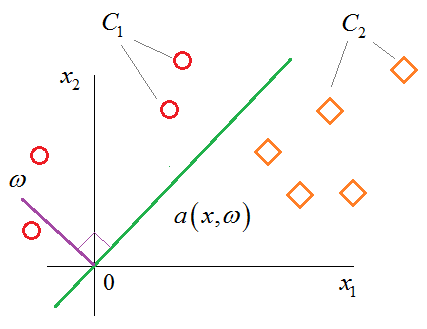

Как теперь классифицировать значения?



*   Если скалярное произведение большу нуля (угол меньше 90), попадем в первый класс.
*   Если скалярное произведение меньше нуля попадаем во второй класс.





## Пример реализации

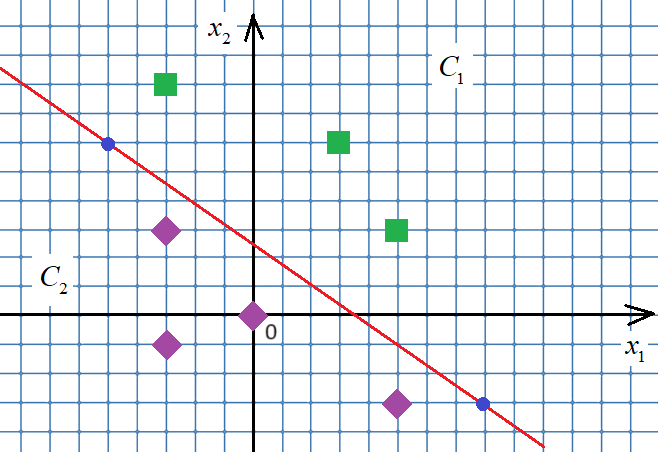

Рассмотрим следующую задачу классификации. Даны значения точек и разделяющая прямая. Нужно вывести значения принадлежности классу

*   +1 - первый класс - квадратики
*   -1 - второй класс - ромбики



In [15]:
x_test = [(5, -3), (-3, 8), (3, 6), (0, 0), (5, 3), (-3, -1), (-3, 3)]

import numpy as np
import sympy as sp

# Координаты точек прямой
p1, p2 = [-5, 6], [8, -3]

# Находим угловой коэффициент k и смещение b (w0)
k, w0 = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1) # if p1[0] != p2[0] else np.inf, p1[0]

k, w0

(-0.6923076923076926, 2.538461538461539)

In [16]:
# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]

w

[2.538461538461539, -0.692307692307692, -1.00000000000000]

In [18]:
w1 = w[1]
w2 = w[2]

predict = [np.sign(-w1*x1 - w2*x2 - w0) for x1, x2 in x_test]

predict

[-1, 1, 1, -1, 1, -1, -1]

## ! Задание 1

Вычислить метки для элементов.

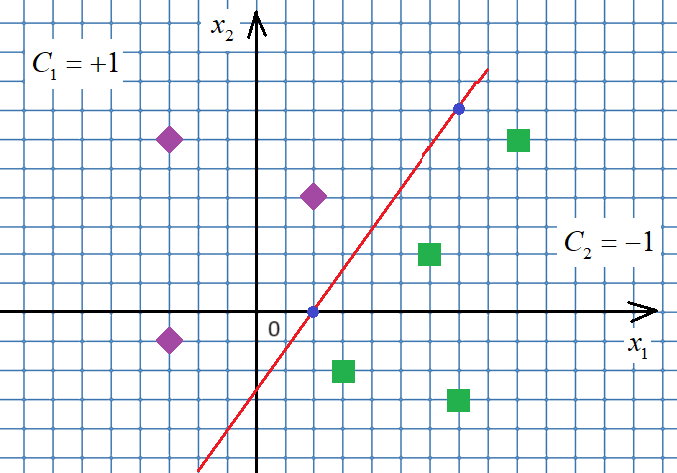

In [ ]:
x_test = [(9, 6), (2, 4), (-3, -1), (3, -2), (-3, 6), (7, -3), (6, 2)]

import numpy as np
import sympy as sp

# решение по аналогии с предыдущем примером

# Логистическая регрессия

Почему бы нам возвращать не номер класса 1 или -1, а вероятность появления прогнозируемого класса?

Будем использовать вероятностный подход для описания данной задачи $P(y | x, w)$.

Чтобы решить поставленную задачу, нам нужно понять, как вычислять вектор весов $w$. И, так как у нас вероятностная постановка задачи, то этот вектор будем искать, опираясь на выражение вероятности . Для этого в машинном обучении пользуются **методом максимального правдоподобия**:

$ w_* = arg max_w P(y | x, w).$

То есть, мы выбираем такое $ w_*$, при котором вероятность достигает максимального значения.

Т. к. у нас не одно наблюдение, а выборка, мы переходим к функции правдоподобия:

$ log L(w) = ∑_{i=1}^l log P (y_i | x_i,w) \to \max_w$.

Отсюда следует важный, ключевой вывод: вероятностный взгляд на задачи машинного обучения и взгляд через определение моделей с функциями потерь – это, фактически, одно и то же. Мы совершенно спокойно можем переходить из модельной плоскости в вероятностную и обратно при решении любых задач машинного обучения.


Если мы приравняем нашу функцию правдоподобия к логарифмической функции потерь, то получим, что оценки могут быть найдены с помощью сигмоидальной функции.

$σ(M) = \frac{1}{1+e^{-M}}$.




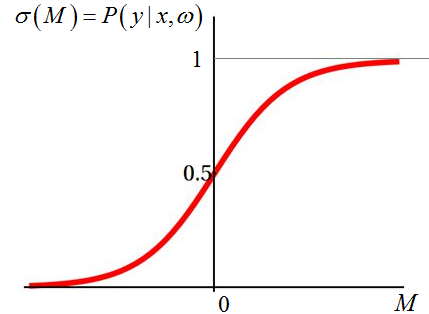

Из рисунка хорошо видно, что чем дальше от разделяющей гиперплоскости находится правильно спрогнозированный класс (M > 0), тем выше значение вероятности (уверенности) классификатора, что прогноз верен. И, наоборот, если знак отступа отрицательный (M < 0), значит, произошла ошибка классификации и вероятность будет меньше 0,5. Если же образ оказался точно на разделяющей гиперплоскости, то на выходе увидим значение 0,5, то есть, классификатор не уверен, к какому классу отнести текущий вектор.

## Пример реализации. Digits dataset

In [47]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

# load the digit dataset
digits = datasets.load_digits()

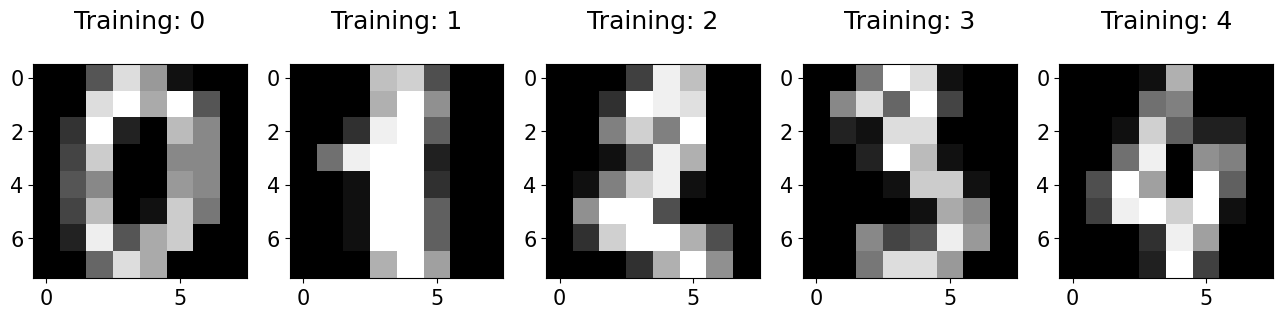

In [48]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 18)

In [55]:
# defining feature matrix(X) and response vector(y)
X = digits.data
y = digits.target
# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# create logistic regression object
reg = linear_model.LogisticRegression() #linear_model.LinearRegression()

reg

LinearRegression()

In [56]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [57]:
# making predictions on the testing set
y_pred = reg.predict(X_test)

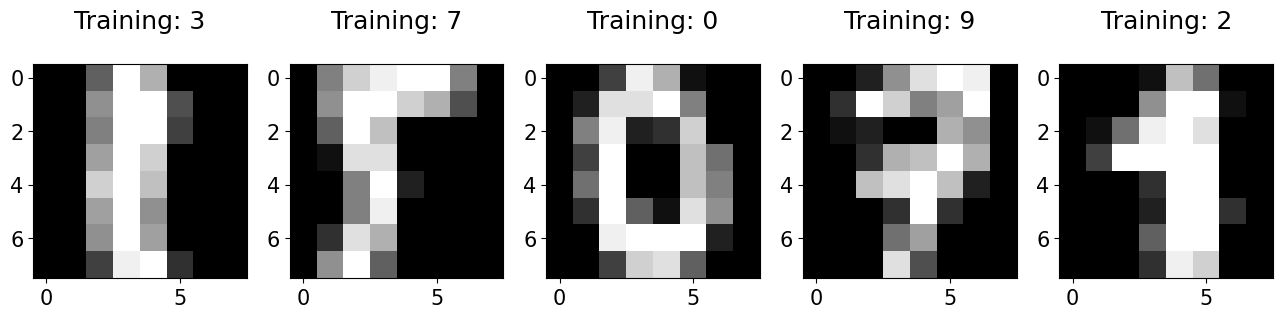

In [58]:
plt.figure(figsize=(16,9))
for index, (image, label) in enumerate(zip(X_test[0:5],y_pred[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 18)

# Метрики качества

Перед переходом к самим метрикам необходимо ввести важную концепцию для описания этих метрик в терминах ошибок классификации — confusion matrix (матрица ошибок).
Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов, тогда матрица ошибок классификации будет выглядеть следующим образом:

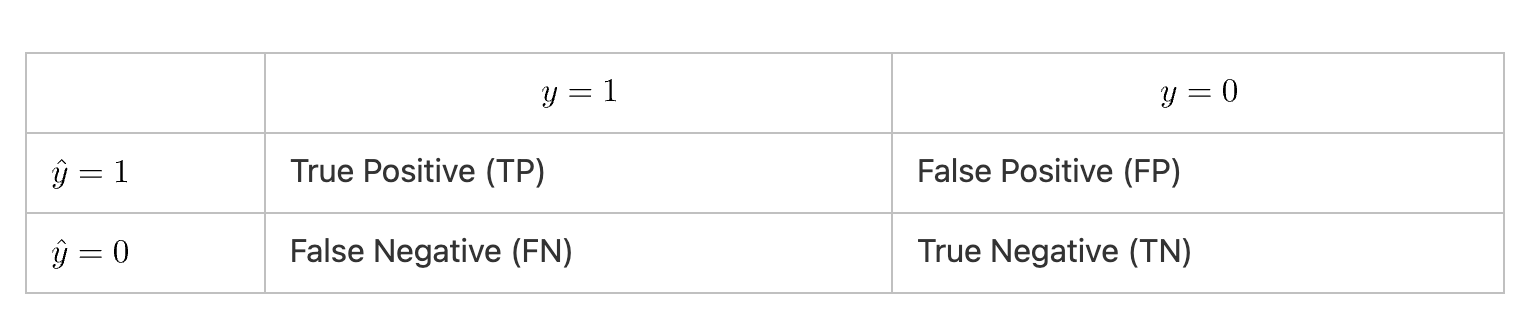



**Accuracy** — доля правильных ответов алгоритма:

$ Accuracy= \frac{True Positives+True Negatives}{Total}$

**Precision** можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а **recall** показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

$Precision= \frac{True Positives}{True Positives+False Positives}$


$Recall= \frac{True Positives}{True Positives+False Negatives}$

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

Существует несколько различных способов объединить precision и recall в агрегированный критерий качества. F-мера (в общем случае $\ F_\beta$) — среднее гармоническое precision и recall :

​form.svg

$\beta$ в данном случае определяет вес точности в метрике, и при $\beta = 1$ это среднее гармоническое (с множителем 2, чтобы в случае precision = 1 и recall = 1 иметь $\ F_1 = 1$.


F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

In [41]:
from numpy.typing import ArrayLike


def accuracy(y_true: ArrayLike, y_pred: ArrayLike) -> float:
  return sum(y_true == y_pred) / len(y_true)

In [44]:
# for digits datasets
accuracy(y_test, y_pred)*100

96.52294853963839

## ! Задание 2.
Реализуйте следующие метрики:
- Recall и Precision
- F1-score с вызовом Recall и Precision внутри (**со звездочкой**, если вместо F1-score будет реализована общая метрика F-score, а по умолчанию использоваться beta=1)

# Построение простейших ML-моделей на примере Titanic dataset

In [4]:
import pandas as pd
import numpy as np

In [6]:
# Загружаем .csv файл в DataFrame:
df = pd.read_csv("titanic.csv", usecols=["Survived", "Pclass", "Name", "Sex", "Age", "Fare"])
df.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,8.0500


## Постановка задачи

Хотим научиться предсказывать, выживет ли поссажир, исходя из его признаков

<Axes: >

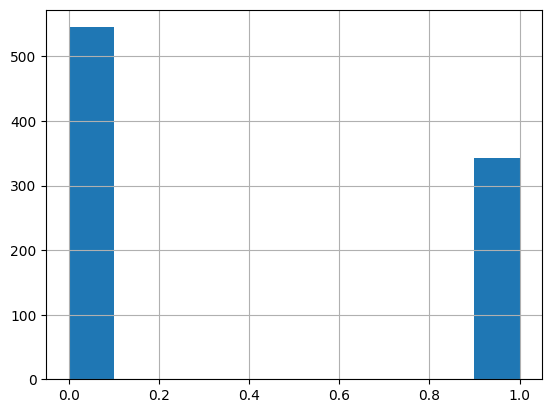

In [7]:
df["Survived"].hist(bins=10)

## Препроцессинг данных

Практически все модели работают только с числовыми признаками (фичами), поэтому все фичи необходимо перевести в int/float


In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,8.0500


## Gender

In [9]:
pd.get_dummies(df["Sex"], prefix="Sex").head()

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [10]:
# Нам достаточно только одной колонки для бинарной фичи (для N-нарной достаточно N-1 колонок)
pd.get_dummies(df["Sex"], prefix="Sex", drop_first=True).head()

,Sex_male
0,True
1,False
2,False
3,False
4,True


In [11]:
df["Sex"] = pd.get_dummies(df["Sex"], drop_first=True)

In [12]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,Mr. Owen Harris Braund,True,22.0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,False,38.0,71.2833
2,1,3,Miss. Laina Heikkinen,False,26.0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,False,35.0,53.1000
4,0,3,Mr. William Henry Allen,True,35.0,8.0500


## Name

In [13]:
# посчитаем самое простое - длину имени
df["Name_len"] = df["Name"].str.len()

## Разбиваем данные на train и test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
len(df), len(df_train), len(df_test)

(887, 709, 178)

In [17]:
df

,Survived,Pclass,Name,Sex,Age,Fare,Name_len
0,0,3,Mr. Owen Harris Braund,True,22.0,7.2500,22
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,False,38.0,71.2833,50
2,1,3,Miss. Laina Heikkinen,False,26.0,7.9250,21
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,False,35.0,53.1000,43
4,0,3,Mr. William Henry Allen,True,35.0,8.0500,23
...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,True,27.0,13.0000,20
883,1,1,Miss. Margaret Edith Graham,False,19.0,30.0000,27
884,0,3,Miss. Catherine Helen Johnston,False,7.0,23.4500,30
885,1,1,Mr. Karl Howell Behr,True,26.0,30.0000,20


## Обучаем модель

In [19]:
# выбираем колонки, которые будем использовать в качестве фичей и таргета
features = ["Pclass", "Sex", "Age", "Fare", "Name_len"]
target = "Survived"

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
# объявляем модель (можно менять параметры, читайте доку)
model = LogisticRegression(random_state=42)

In [22]:
# обучаем модель
model.fit(X=df_train[features], y=df_train[target])

LogisticRegression(random_state=42)

In [23]:
# делаем предсказания
df_train["predict"] = model.predict(df_train[features])
df_test["predict"] = model.predict(df_test[features])

## Confusion matrix

Confusion matrix, without normalization
[[96 15]
 [28 39]]


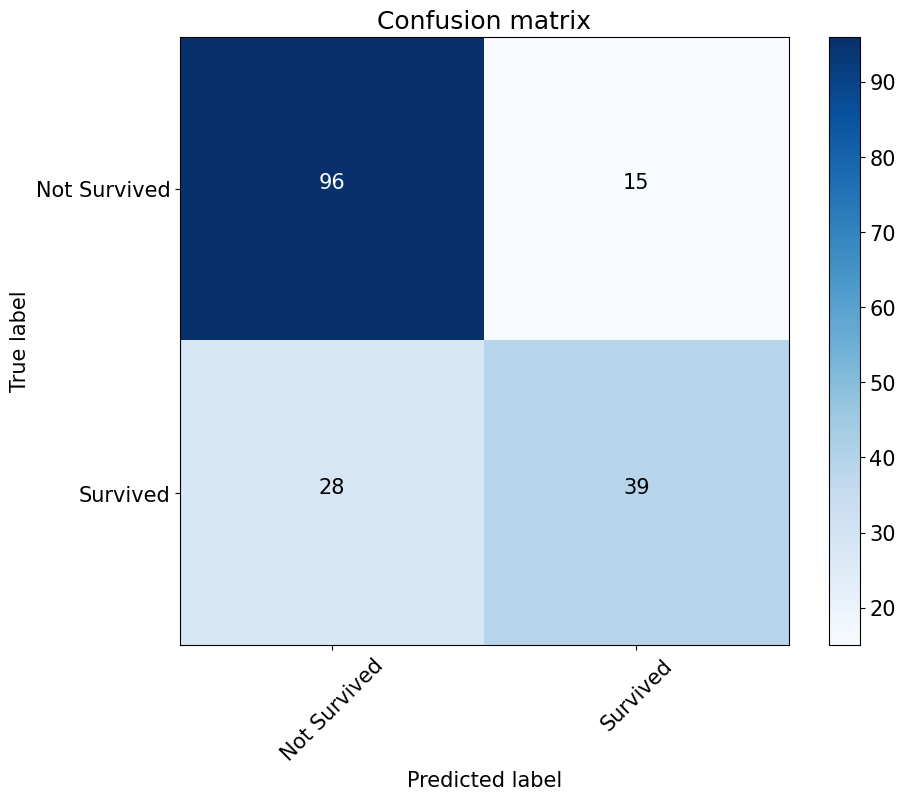

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
import itertools

X_train, X_test, y_train, y_test = df_train[features], df_test[features], df_train["Survived"], df_test["Survived"]

# Обучаем ставшую родной логистическую регрессию

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Воспользуемся функцией построения матрицы ошибок из документации sklearn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, lr.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Not Survived', 'Survived'],
                      title='Confusion matrix')
plt.show()

In [24]:
# train set
accuracy(y_true=df_train["Survived"], y_pred=df_train["predict"])

0.8124118476727785

In [25]:
# test set
accuracy(y_true=df_test["Survived"], y_pred=df_test["predict"])

0.7584269662921348

## !  Задание 4

* Добавьте еще новых фичей (по 1 за каждый балл, но не больше 3), добавьте их к обучению модели.

* Получите значение accuracy выше, чем текущее на этом же test-сете. Для этого можете добавлять новые фичи, удалять старые, менять параметры модели и т.д., но не перемешивайте данные!

## Влияние фичей

Для небольших моделей с малым количеством весов (линейные модели, логистическая регрессия) можно смотреть на вес при каждом признаке.<br>Чем вес по модулю больше - тем важнее фича, а знак отвечает за то, в положительную или отрицательную сторону признак двигает таргет

In [26]:
from typing import Any
from matplotlib import pyplot as plt


# подходит для некоторых функций из sklearn-а, если хотите использовать другие модели - нужно написать кастомную функцию
def plot_feat_importance(model: Any, abs_coefs: bool = True):
  coefficients = model.coef_
  importance = np.abs(model.coef_)[0] if abs_coefs else model.coef_[0]
  feature_importance = pd.DataFrame({'feature': features, 'importance': importance, 'abs_importance': np.abs(importance)})
  feature_importance = feature_importance.sort_values('abs_importance', ascending=True)
  feature_importance.plot(x='feature', y='importance', kind='barh', figsize=(7, 4))
  plt.show()


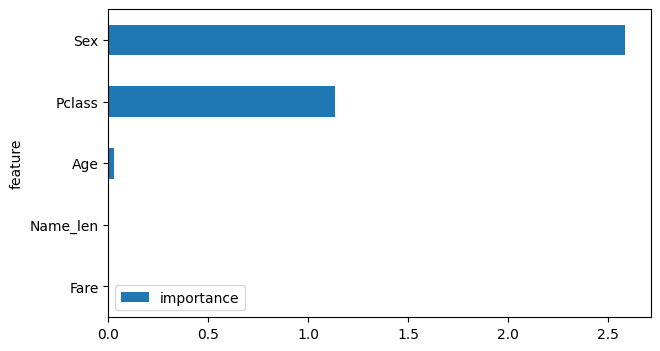

In [27]:
# в абсолютах
plot_feat_importance(model=model, abs_coefs=True)

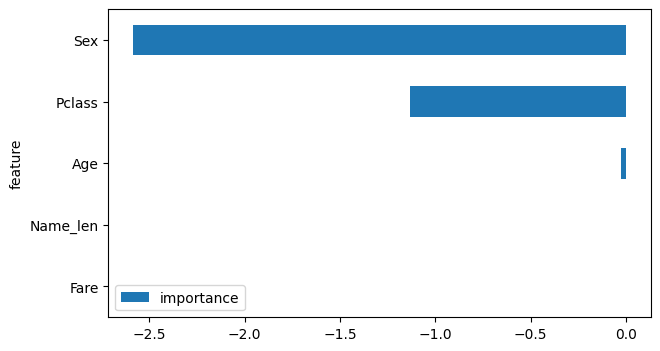

In [28]:
# не в абсолютах
plot_feat_importance(model=model, abs_coefs=False)

In [29]:
df_train.groupby(["Sex"])["Survived"].mean()

,Survived
Sex,
False,0.750958
True,0.176339


In [30]:
df_train.groupby(["Pclass"])["Survived"].mean()

,Survived
Pclass,
1,0.641176
2,0.489655
3,0.241117


# ! Задание 5

Найдите (или соберите) новый датасет, в котором решаемую задачу можно свести к отличной от бинарной классификации. И проделайте все те же самые действия, а именно:
- Изучите данные
- Сформулируйте задачу
- Обработайте данные и проведите feature-engineering
- Разбейте данные на train и test
- Подберите и реализуйте метрики
- Подберите и обучите модель
- Замерьте качество получившейся модели
- Посмотрите на влияние отдельных признаков (если используете более сложные модели, то можете использовать библиотеку [SHAP](https://shap.readthedocs.io/en/latest/))